# Assignment 2
* This assignment focuses on analyzing social media sanctions and their potential relationship to political beliefs.  

> Giorgos Papoutsakis 8200137

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

* First, we need to read the data and take a look at the dataframe.

In [2]:
df = pd.read_csv("data/mosleh_et_al_data.csv")
df

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
0,-0.231902,-1.168745,-0.080295,0.598883,0.279221,0.185315,0.292807,0.350000,0,0,...,0.109935,0.813230,0.076835,0.274317,0.00000,0.909460,69,86.0,30,7
1,0.405261,1.060905,2.296375,0.774873,0.848639,0.614156,0.513147,0.975087,0,1,...,0.115985,0.793715,0.090250,0.351800,0.00000,0.157056,623,133.0,26,20
2,-0.171067,-0.500076,-2.312730,0.548727,0.242347,0.130950,0.242445,0.300000,0,0,...,0.085765,0.817340,0.096915,0.279591,0.00000,0.445349,32,3.0,3,6
3,-0.085814,-0.748035,-1.507481,0.611501,0.360119,0.180055,0.277793,0.316038,0,0,...,0.108680,0.781135,0.110190,0.290277,0.00000,0.256665,55,104.0,29,22
4,0.595367,1.347730,2.010573,0.700217,0.698661,0.430655,0.554609,0.763889,0,1,...,0.065145,0.860550,0.074320,0.300823,0.00000,0.431149,37,36.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,-0.115066,-0.604443,NaN,0.559728,0.257015,0.167228,0.473955,0.336758,1,0,...,0.087090,0.863170,0.049770,0.206279,0.00000,NaN,134,724.0,22,3
8996,0.499673,1.019845,1.689321,0.703698,0.720918,0.399594,0.568832,0.772321,1,1,...,0.067430,0.843105,0.089495,0.300414,0.00000,0.890596,66,71.0,27,14
8997,-0.214569,-0.925605,NaN,0.627648,0.400227,0.217915,0.303897,0.355212,1,0,...,0.083680,0.849685,0.066635,0.283650,0.57735,NaN,240,99.0,22,46
8998,0.424927,0.925060,1.525494,0.764551,0.808780,0.388632,0.462972,0.863636,1,1,...,0.112050,0.808630,0.079320,0.332652,0.00000,0.900122,32,210.0,15,22


# Twitter Suspensions after the 2020 Election

* It is important to understand which code corresponds to each political category in the column `politics_hashtag`:
- 0: Biden supporters - Liberals
- 1: Trump supporters - Conservatives

In [3]:
df["politics_hashtag"].value_counts()

politics_hashtag
1    4505
0    4495
Name: count, dtype: int64

* Before the crosstabulation, we check for NaN values.

In [4]:
print(df['politics_hashtag'].isna().sum())
print(df['suspended'].isna().sum())

0
0


* Then we will create the contingency table.

In [5]:
crosstab = pd.crosstab(df['politics_hashtag'], df['suspended'])
crosstab

suspended,0,1
politics_hashtag,,
0,4295,200
1,3623,882


* Indeed as expected from the instructions, suspended Trump supporters are 4.4 times more than suspended Biden supporters.

* Now, we aim to examine whether the above results are independent of each other or if there is a significant relationship between politic orientation and suspention.  
* To achieve this, we will perform a Χ² test.  
* The hypotheses are as follows:  
  * **H₀**: `politics_hashtag` and `suspended` are independent of each other.  
  * **H₁**: `politics_hashtag` and `suspended` are dependent.

In [6]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(crosstab)

In [7]:
print(f"Chi-squared: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-squared: 485.467
P-value: 0.000


* For significance threshold, we will use a=0.05
* Since the p-value is 0, which is lower than the significance threshold, the relationship is statistically significant.
* So, we reject the H₀ and accept hypothesis H₁.
* This means that the two variables (`politics_hashtag` and `suspended`) are not independent but instead depend on each other.
* In simple terms, there is a relationship between being a Trump supporter and getting suspended.

# Distributions of Relative Frequency of Low Quality

* For the standardization with z-scores of the x-axis, we will use the StandardScaler, as it removes the mean and divides by the standard deviation.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
df['lowqual_pr2019_fc_zscaled'] = scaler.fit_transform(df[['lowqual_pr2019_fc']])
df['lowqual_pr2019_crowd_zscaled'] = scaler.fit_transform(df[['lowqual_pr2019_crowd']])

* We will also create a new column in order make easier the correct legend for the plots.

In [10]:
df['People who shared'] = df['politics_hashtag'].map({0: 'Biden hashtags', 1: 'Trump hashtags'})

* And now we are ready to plot both figures.

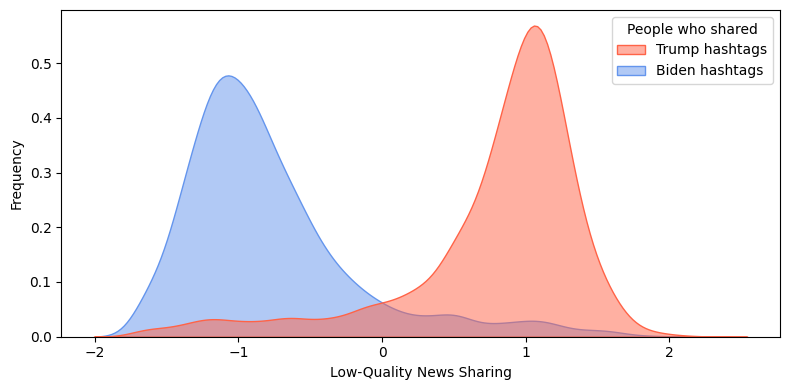

In [11]:
plt.figure(figsize=(8, 4))
palette = {'Biden hashtags': 'cornflowerblue', 'Trump hashtags': 'tomato'}
sns.kdeplot(
    data=df, 
    x='lowqual_pr2019_fc_zscaled', 
    hue='People who shared',
    hue_order = ['Trump hashtags', 'Biden hashtags'],
    palette = palette,
    fill=True,
    alpha=0.5
)

plt.xlabel("Low-Quality News Sharing")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

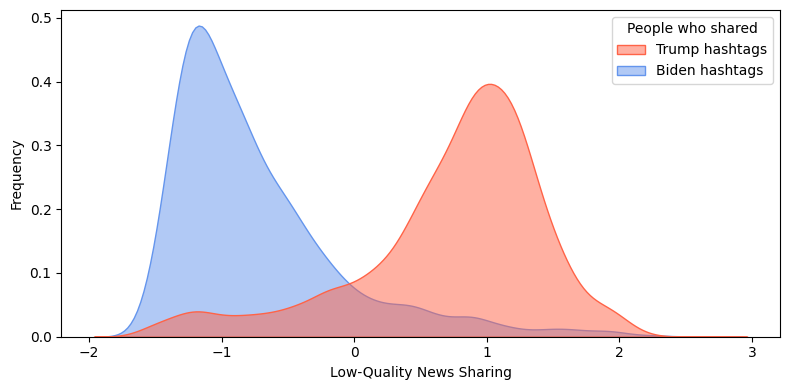

In [12]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df, 
    x='lowqual_pr2019_crowd_zscaled', 
    hue='People who shared',
    hue_order = ['Trump hashtags', 'Biden hashtags'],
    palette = palette,
    fill=True,
    alpha=0.5,
)

plt.xlabel("Low-Quality News Sharing")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* Both plots show that the distributions are centered around completely different values.  
* Both fact-checkers and crowd evaluations indicate that the metric for low-quality news sharing is mostly **negative for Biden's supporters**.  
* On the other hand, the metric is mostly **positive for Trump's supporters**, suggesting that they share more low-quality content.  
* In the next section, we will test whether the means of these metrics, along with additional columns, are equal and if the observed differences could be attributed to chance.

## Low-quality News Sharing on Twitter

* In this section, we will test whether the means of several low-quality variables/metrics are equal between Trump and Biden supporters.
* First, we define the variables.

In [13]:
low_qual_variables = [
    'lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_mbfc',
    'lowqual_lasser2019', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep'
]

* We will test the above hypotheses with a t-test.
* A t-test checks whether the difference between the means of two samples is statistically significant, meaning it is unlikely to have occurred by chance.
* The hypotheses are:  
  * **H₀**: The means of the two groups are equal (or very close).  
  * **H₁**: The means of the two groups are different.
* If the p-value is lower than the significant threashold(a=0.05), then we reject the H₀ and accept hypothesis H₁, meaning that the means of the two groups are different.

* Before performing the t-test, it is important to check whether the variances of the two groups being compared are equal or different.  
* This information is required as a parameter for the t-test.  
* To check the equality of variances, we use **Levene's** test.  
* Levene's test evaluates whether the variances of two samples differ significantly, suggesting that any observed difference is unlikely to be due to random variation.  
* The hypotheses are:  
  * **H₀**: The variances of the two groups are equal.  
  * **H₁**: The variances of the two groups are different.
* If the p-value is lower than the significant threashold(a=0.05), then the variances are unequal.
* Else the variances are equal.

In [14]:
from scipy.stats import ttest_ind
from scipy.stats import levene

* We start by checking if any of them have NaN values.

In [15]:
selected_columns = low_qual_variables + ['politics_hashtag']
df_low_qual = df[selected_columns].copy()
df_low_qual.isna().sum()

lowqual_pr2019_fc          55
lowqual_afm                 2
lowqual_mbfc                1
lowqual_lasser2019          1
lowqual_pr2019_crowd       55
lowqual_pr2019_crowdrep    55
politics_hashtag            0
dtype: int64

* We will drop all the NaN rows so the tests can run successfully.

In [16]:
df_low_qual = df_low_qual[selected_columns].dropna()

* We will define the two different groups based on their `politcs_hashtag`.

In [17]:
group0 = df_low_qual[df_low_qual['politics_hashtag'] == 0]
group1 = df_low_qual[df_low_qual['politics_hashtag'] == 1]

* Before running the t-test, we need to create the functions that calculate Cohen's d and Hedges' g.

In [18]:
#s^2
def sample_variance(group):
    n = len(group)
    mean = np.mean(group)
    variance = np.sum((group - mean) ** 2) / (n - 1)
    return variance

#s for two groups
def pooled_std(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1_squared = sample_variance(group1)
    s2_squared = sample_variance(group2)
    pooled_variance = ((n1 - 1) * s1_squared + (n2 - 1) * s2_squared) / (n1 + n2 - 2)
    return np.sqrt(pooled_variance)

def cohen_d(group1, group2, pooled_std):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    return (mean1 - mean2) / pooled_std

def hedges_g(group1, group2, d):
    n1 = len(group1)
    n2 = len(group2)
    return (1 - (3 / (4 * (n1 + n2) - 9))) * d

* Finally, we can run the t-test and calculate Cohen's d and Hedges' g.  
* For the parameters, we will always pass `group1` first to ensure positive metric results, as `group1` (Conservatives) generally has larger values than `group0` (Liberals) in low-quality variables.

In [19]:
results = []

for var in low_qual_variables:
    # levene's test
    levene_stat, levene_p_value = levene(group1[var], group0[var])
    equal_var = levene_p_value >= 0.05
    
    # t-test
    t_stat, p_value = ttest_ind(group1[var], group0[var], equal_var=equal_var)
        
    # pooled std
    pooled_standard_dev = pooled_std(group0[var], group1[var])
    
    # cohen's d
    d = cohen_d(group1[var], group0[var], pooled_standard_dev)
    
    # hedges' g
    g = hedges_g(group1[var], group0[var], d)
    
    results.append({
        'Variable': var,
        't_stat': t_stat,
        'p_value': p_value,
        'Cohen_d': d,
        'Hedges_g': g
    })

* We can see the results in a dataframe.

In [20]:
results_df = pd.DataFrame(results)
results_df

,Variable,t_stat,p_value,Cohen_d,Hedges_g
0,lowqual_pr2019_fc,119.318095,0.0,2.523332,2.523120
1,lowqual_afm,102.892945,0.0,2.173268,2.173086
2,lowqual_mbfc,98.324693,0.0,2.080029,2.079855
3,lowqual_lasser2019,103.115674,0.0,2.176506,2.176324
4,lowqual_pr2019_crowd,102.570718,0.0,2.168384,2.168202
5,lowqual_pr2019_crowdrep,61.120846,0.0,1.292345,1.292236


* First of all, all p-values are 0, indicating that the mean difference between all groups is statistically significant.  
* We will quantify the results using Cohen's d and Hedges' g metrics.  
* These metrics are very similar in this case, as the sample sizes are sufficiently large.  
* According to the interpretation of Cohen's d and Hedges' g, the difference between almost all groups can be characterized as **huge**.  
* The only exception is for sites rated by Republicans, where the difference is slightly smaller but still **very large** and remains practically significant.  
* In simpler terms, there is a substantial difference between Biden and Trump supporters in sharing low-quality news, with liberals sharing significantly less compared to conservatives. The test confirms that this difference did not occur by chance.  
* Even sites rated only by Republicans/Trump supporters (`lowqual_pr2019_crowdrep`) acknowledge this trend, although the difference is slightly reduced.

### Sharing Lower-quality News Sources and Conservative Ideology

* In this section, we will examine the correlation between pairs of low-quality metrics and political metrics.  
* First, we will define the variables.

In [21]:
lowqual_columns = [
    "lowqual_pr2019_fc", "lowqual_lasser2019", "lowqual_mbfc", 
    "lowqual_afm", "lowqual_pr2019_crowd", "lowqual_pr2019_crowdrep"
]

politics_columns = [
    "politics_followed", "politics_hashtag", "politics_sites1", "politics_sites2"
]

* We will generate the full correlation matrix and then filter it to include only the relevant rows and columns.

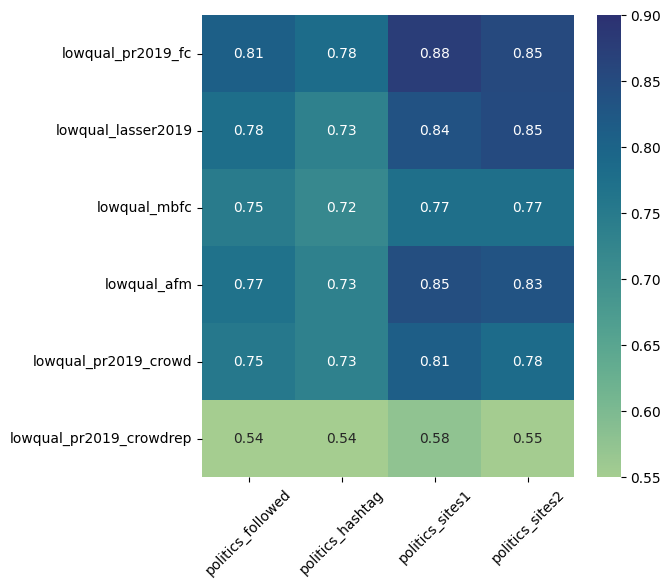

In [22]:
correlation_matrix = df[lowqual_columns + politics_columns].corr()
correlation_matrix_filtered = correlation_matrix.loc[lowqual_columns, politics_columns]


plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='crest', vmin=0.55, vmax=0.9, fmt=".2f")
plt.xticks(rotation=45)
plt.show()

* **Low quality variables** measure the quality of news sources shared, with higher values indicating lower quality of news.  
* **Politics variables** estimate political ideology, where low values represent Liberals/Biden supporters and high values represent Conservatives/Trump supporters.  
* All correlations are **positive and relatively high**, indicating a clear relationship: **as the quality of shared news decreases**(higher value in low-quality variable), **political ideology becomes more conservative**(higher value in political variable).  
* Correlations are **lower when rated by Republicans** (`lowqual_pr2019_crowdrep`), suggesting republicans may perceive low-quality sites differently, potentially due to political bias.  

## News Sharing Can Help Explain Suspension, Using Single Predictors

* In this section, we aim to predict suspension using a single predictor at a time with a probit model.
* First, we define the single predictors. 
* Among these predictors, `politics_hashtag` is the main focus of our analysis.

In [23]:
single_predictors = [
    'politics_hashtag', 'politics_sites1', 'politics_sites2', 
    'politics_followed', 'lowqual_afm', 'lowqual_mbfc', 
    'lowqual_lasser2019', 'lowqual_pr2019_fc', 'lowqual_pr2019_crowd'
]

* Check if any of them have NaN values.

In [24]:
selected_columns = single_predictors + ['suspended']
df_filtered = df[selected_columns].copy()
df_filtered.isna().sum()

politics_hashtag           0
politics_sites1            0
politics_sites2            0
politics_followed       1035
lowqual_afm                2
lowqual_mbfc               1
lowqual_lasser2019         1
lowqual_pr2019_fc         55
lowqual_pr2019_crowd      55
suspended                  0
dtype: int64

* We will drop all rows with NaN values so that the probit model can run properly.

In [25]:
df_filtered = df_filtered[selected_columns].dropna()

* We will perform 100 iterations, each time creating a new sample through resampling (**bootstrap method**).  
* The new sample will have the same size as the filtered dataset's column corresponding to the predictor. 
* Predictions will be made on the bootstrap sample.  
* For evaluation metrics, we will use the **roc_curve** and **auc_score**.

In [26]:
from sklearn.utils import resample
from statsmodels.formula.api import probit
from sklearn.metrics import roc_curve, auc

In [27]:
n_iterations = 100
results = []

for predictor in single_predictors:
    print(f"Processing predictor: {predictor}")
    
    sample_size = len(df_filtered[predictor])
    auc_predictor_scores = []
    
    for i in range(n_iterations):
        
        # Create the sample with bootstrap method
        bootstrap_sample = resample(df_filtered, replace=True, n_samples= sample_size)
        
        # Construct and fit the probit model
        model = probit(f"suspended ~ {predictor}", data=bootstrap_sample).fit(disp=0)
        
        # Make predictions for this sample
        bootstrap_sample['predicted_prob'] = model.predict(bootstrap_sample[predictor])
        
        # Calculate auc_score for this sample
        fpr, tpr, _ = roc_curve(bootstrap_sample['suspended'], bootstrap_sample['predicted_prob'])
        auc_score = auc(fpr, tpr)
        auc_predictor_scores.append(auc_score)
    
    # Calculate mean AUC and confidence intervals between 5% and 95%
    mean_auc = np.mean(auc_predictor_scores)
    ci_lower = np.percentile(auc_predictor_scores, 5)
    ci_upper = np.percentile(auc_predictor_scores, 95)
    
    results.append({
        "Predictor": predictor,
        "Mean AUC": mean_auc,
        "CI Lower": ci_lower,
        "CI Upper": ci_upper
    })

Processing predictor: politics_hashtag
Processing predictor: politics_sites1
Processing predictor: politics_sites2
Processing predictor: politics_followed
Processing predictor: lowqual_afm
Processing predictor: lowqual_mbfc
Processing predictor: lowqual_lasser2019
Processing predictor: lowqual_pr2019_fc
Processing predictor: lowqual_pr2019_crowd


* We can display the result as a DataFrame.

In [28]:
results_df = pd.DataFrame(results)
results_df

,Predictor,Mean AUC,CI Lower,CI Upper
0,politics_hashtag,0.697685,0.686755,0.711651
1,politics_sites1,0.716587,0.705539,0.729835
2,politics_sites2,0.722908,0.709519,0.733133
3,politics_followed,0.716069,0.702959,0.731658
4,lowqual_afm,0.732764,0.719661,0.748896
5,lowqual_mbfc,0.722388,0.709029,0.736401
6,lowqual_lasser2019,0.721900,0.709069,0.736956
7,lowqual_pr2019_fc,0.714425,0.702537,0.726622
8,lowqual_pr2019_crowd,0.702177,0.688463,0.714951


* We will rename the columns and add a new column in order to replicate the plot.

In [29]:
single_predictors_new_names = {
    'politics_hashtag': 'Hashtag shared',
    'politics_sites1': 'News sites shared 1',
    'politics_sites2': 'News sites shared 2',
    'politics_followed': 'Accounts followed',
    'lowqual_afm': 'AFM ratings',
    'lowqual_mbfc': 'MBFC ratings',
    'lowqual_lasser2019': 'Lasser ratings',
    'lowqual_pr2019_fc': 'Fact-checkers ratings',
    'lowqual_pr2019_crowd': 'Layperson ratings'
}

In [30]:
results_df['Predictor'] = results_df['Predictor'].replace(single_predictors_new_names)
results_df['Classes'] = ['Political orientation'] * 4 + ['Low-quality news sharing'] * 5
results_df

,Predictor,Mean AUC,CI Lower,CI Upper,Classes
0,Hashtag shared,0.697685,0.686755,0.711651,Political orientation
1,News sites shared 1,0.716587,0.705539,0.729835,Political orientation
2,News sites shared 2,0.722908,0.709519,0.733133,Political orientation
3,Accounts followed,0.716069,0.702959,0.731658,Political orientation
4,AFM ratings,0.732764,0.719661,0.748896,Low-quality news sharing
5,MBFC ratings,0.722388,0.709029,0.736401,Low-quality news sharing
6,Lasser ratings,0.721900,0.709069,0.736956,Low-quality news sharing
7,Fact-checkers ratings,0.714425,0.702537,0.726622,Low-quality news sharing
8,Layperson ratings,0.702177,0.688463,0.714951,Low-quality news sharing


* Also, we need to calculate the intervals for the error bars.

In [31]:
ci_lowers = results_df["Mean AUC"] - results_df["CI Lower"]
ci_uppers = results_df["CI Upper"] - results_df["Mean AUC"]
intervals = [ci_lowers, ci_uppers]

* Lastly, in order to make the plot as close as possible to the one in the instructions, we need to change the labels using regular expressions.  
* If the label has an empty space or a hyphen (-), it will be swapped with a new line.  
* However, if the next character is a number, there won't be any new line.

In [32]:
import re

labels = results_df['Predictor']
wrapped_labels = []
for label in labels:
    label = re.sub(r'(?<!\d) (?!\d)', "\n", label)
    label = label.replace("-", "-\n")
    wrapped_labels.append(label)

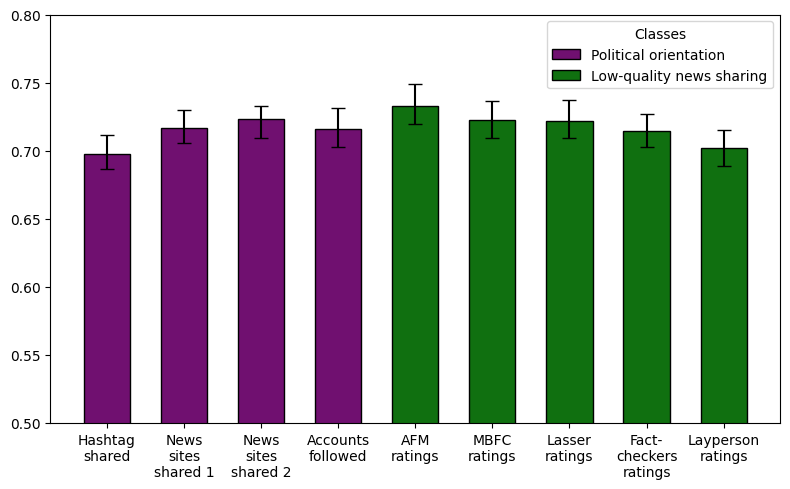

In [33]:
plt.figure(figsize=(8, 5))

palette = {'Political orientation': 'purple', 'Low-quality news sharing': 'green'}
sns.barplot(x='Predictor', y='Mean AUC', hue='Classes', data=results_df,  palette=palette, width=0.6, edgecolor='black', linewidth=1)

plt.errorbar(x=np.arange(len(results_df)), y=results_df["Mean AUC"], yerr=intervals, fmt='none', capsize=5, color='black')

plt.xticks(ticks=np.arange(len(labels)), labels=wrapped_labels)
plt.ylim(0.5, 0.8)

#no tiltes
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

* We observe that `hashtag shared`, previously known as `politics_hashtag`, has the lowest mean AUC metric compared to all other single predictors.  
* This indicates that, while it remains important (with a mean AUC close to 70%), it is **less significant** than the other predictors when examined individually.  
* Additionally, its AUC value is lower than that of any low-quality variable.  
* This suggests that sharing misinformation is a stronger indicator of suspension than simply being a Trump supporter.

## News Sharing Can Help Explain Suspension, Using Multiple Predictors

* In the final section, we aim to predict suspension using multiple predictors.  
* To achieve this, we group multiple variables with similar themes using PCA.  
* As a first step, we fill all NaN values with the mean of each respective column.

In [34]:
df = df.drop(columns = ['People who shared'])
df_filled = df.fillna(df.mean())

* Log-transform some variables.

In [35]:
df_filled['log_repeated_tweet_count'] = np.log10(df_filled['repeated_tweet_count'] + 1)
df_filled['log_freq_pr_1h'] = np.log10(df_filled['freq_pr_1h'] + 1)
df_filled['log_num_followers'] = np.log10(df_filled['num_followers'] + 1)
df_filled['log_num_friends'] = np.log10(df_filled['num_friends'] + 1)
df_filled['log_fol'] = np.log10((df_filled['num_friends'] + 1) / (df_filled['num_followers'] + 1))

* We will apply the winsorization procedure to various variables.  
* Winsorization involves limiting extreme values in the data to reduce the impact of outliers.  
* Some variables will be winsorized on both sides (lower and upper bounds), while others only on the upper side.

In [36]:
from scipy.stats.mstats import winsorize

* Both sides by top 1%.

In [37]:
variables_to_winsorize_both = [
    'valence_neg', 'valence_neu', 'valence_pos', 'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]

for var in variables_to_winsorize_both:
    df_filled[var] = winsorize(df_filled[var], limits=(0.01, 0.01))

* Only upper side by top 1%.

In [38]:
variables_to_winsorize_upper = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit', 
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]

for var in variables_to_winsorize_upper:
    df_filled[var] = winsorize(df_filled[var], limits=(0, 0.01))

* Now we will repeatedly perform PCA procedures. The procedure is as follows:  
  * Define the variables.  
  * Scale them.  
  * Create the PCA constructor and specify the number of components.  
  * Fit the PCA model and transform the data into its principal components. 
  * Add the new PCA variables to the dataframe.  
  * Interpret the explained variance ratio to understand how much variance is explaiend by each component.

In [39]:
from sklearn.decomposition import PCA

* PCA for low quality variables.

In [40]:
low_quality_vars = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']

scaler = StandardScaler()
scaled_low_quality_data = scaler.fit_transform(df_filled[low_quality_vars])

pca = PCA(n_components=1)
pc1 = pca.fit_transform(scaled_low_quality_data)

df_filled['pc1_misinfo'] = pc1

explained_variance_ratio = pca.explained_variance_ratio_[0]
print(f"Explained Variance Ratio (PC1 Misinformation): {explained_variance_ratio:.2f}")

Explained Variance Ratio (PC1 Misinformation): 0.87


* PCA for politics variables.

In [41]:
politics_vars = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']

scaled_politics_data = scaler.fit_transform(df_filled[politics_vars])

pca_politics = PCA(n_components=1)
pc1_politics = pca_politics.fit_transform(scaled_politics_data)

df_filled['pc1_politics'] = pc1_politics

explained_variance_ratio_politics = pca_politics.explained_variance_ratio_[0]
print(f"Explained Variance Ratio (PC1 Politics): {explained_variance_ratio_politics:.2f}")

Explained Variance Ratio (PC1 Politics): 0.88


* Additionally, create the `extremity` variable as the absolute value of `pca_politics`.  
* This variable identifies extremists from both sides.

In [42]:
df_filled['extremity'] = df_filled['pc1_politics'].abs()

* PCA for friends and followers variables.

In [43]:
fol_vars = ['log_num_followers', 'log_num_friends', 'log_fol']

scaled_fol_data = scaler.fit_transform(df_filled[fol_vars])

pca_fol = PCA(n_components=1)
pc1_fol = pca_fol.fit_transform(scaled_fol_data)

df_filled['pc1_fol'] = pc1_fol

explained_variance_ratio_fol = pca_fol.explained_variance_ratio_[0]
print(f"Explained Variance Ratio (PC1 Fol): {explained_variance_ratio_fol:.2f}")

Explained Variance Ratio (PC1 Fol): 0.70


* PCA for harmfull language variables.
* For this PCA procedure only, we will use 3 pca components and have to interpret each one.

In [44]:
harmful_language_vars = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit', 
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]

scaled_harmful_data = scaler.fit_transform(df_filled[harmful_language_vars])

pca_harmful = PCA(n_components=3)
pcs_harmful = pca_harmful.fit_transform(scaled_harmful_data)

df_filled['pc1_harmful_language'] = pcs_harmful[:, 0]
df_filled['pc2_harmful_language'] = pcs_harmful[:, 1]
df_filled['pc3_harmful_language'] = pcs_harmful[:, 2]

explained_variance_ratios = pca_harmful.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2f}")

Explained Variance Ratios:
PC1: 0.56
PC2: 0.12
PC3: 0.11


* The reason we opted for 3 components instead of 1 is that the explained variance ratio for the first component is only 56%.
* In other cases, it is at least 70%, which is significantly better compared to 56%.  
* This shows that a single component does not capture enough of the variance to describe the data well, so we need to include more components.  
* To understand the results in more detail, we also need to look at the **loadings**, which show how much each variable contributes to each principal component.

In [45]:
loadings = pca_harmful.components_
loading_matrix = pd.DataFrame(
    loadings.T, 
    index=harmful_language_vars, 
    columns=['PC1', 'PC2', 'PC3']
)

loading_matrix

,PC1,PC2,PC3
rewire_abuse,0.325308,0.344098,-0.307734
rewire_hate,0.235383,0.576538,-0.031956
rewire_profanity,0.252557,-0.231914,-0.430397
rewire_violent,0.232522,0.067403,-0.036995
rewire_sexually_explicit,0.125269,-0.536866,-0.372709
jigsaw_toxicity,0.385472,0.132322,-0.078102
jigsaw_severe_toxicity,0.335861,-0.300996,0.245714
jigsaw_idenity_attack,0.306922,-0.049473,0.462542
jigsaw_insult,0.374408,0.137412,-0.037154
jigsaw_profanity,0.361707,-0.205113,-0.153362


* It follows that the first component is:

  $$z_1 = 0.32 \times x_0 +  0.23 \times x_1 + 0.25 \times x_2 + 0.23 \times x_3 + 0.12 \times x_4 + 0.38 \times x_5 + 0.33 \times x_6 + 0.3 \times x_7 + 0.37 \times x_8 + 0.36 \times x_9 + 0.28 \times x_10$$

* And the second one:

   $$z_2 = 0.34 \times x_0 +  0.57 \times x_1 - 0.23 \times x_2 + 0.06 \times x_3 - 0.53 \times x_4 + 0.13 \times x_5 - 0.3 \times x_6 - 0.04 \times x_7 + 0.13 \times x_8 - 0.2 \times x_9 - 0.17 \times x_10$$

* And the third one:

   $$z_3 = - 0.3 \times x_0 - 0.03 \times x_1 - 0.43 \times x_2 - 0.03 \times x_3 - 0.37 \times x_4 - 0.07 \times x_5 + 0.24 \times x_6 + 0.46 \times x_7 - 0.03 \times x_8 - 0.15 \times x_9 + 0.52 \times x_10$$

* In the above: $x_0$ is `Rewire abuse`, $x_1$ is `Rewire hate`, $x_2$ is `Rewire profanity`, $x_3$ is `Rewire violent`, $x_4$ is `Rewire sexually explicit`, $x_5$ is `Jigsaw toxicity`, $x_6$ is `Jigsaw severe toxicity`, $x_7$ is `Jigsaw idenity attack`, $x_8$ is `Jigsaw insult`, $x_9$ is `Jigsaw profanity`, $x_10$ is `Jigsaw threat`. 

* **The first component** represents a general toxicity dimension, capturing the overall intensity of abusive, insulting, and toxic behavior. All variables contribute positively with similar weights (approximately 25-35%), except for `Rewire sexually explicit`(0.12), which has a much lower contribution.

* **The second component** isolates a hate and abuse language dimension, reflecting expressions that may be directed at groups based on race, religion, politics, etc since groups are a common target for hate language. This component emphasizes hateful and abusive language, contrasting it with other forms of toxicity, such as sexually explicit content or profanity.
  * Largest positive contributions: `Rewire hate`(0.57), `Rewire abuse`(0.34).  
  * Largest negative contributions: `Rewire sexually explicit`(-0.53), `Rewire profanity`(-0.43), `Jigsaw profanity`(-0.2), `Jigsaw severe toxicity`(-0.3).

- **The third component** captures a dimension focused on severe, personalized, and targeted harmful language. This includes threats and identity-based attacks.  
  * Largest positive contributions: `Jigsaw threat`(0.52), `Jigsaw identity attack`(0.46), `Jigsaw severe toxicity`(0.24).  
  * Largest negative contributions: `Rewire profanity`(-0.43), `Rewire sexually explicit`(-0.37), `Rewire abuse`(-0.3).

* A **common pattern** across all components is that `Rewire sexually explicit` consistently has the lowest weight. This suggests that sexually explicit language is less important to the toxic or harmful dimensions captured by the PCA components.

* Harmful language components summary:
    * First component: **General toxicity**  
    * Second component: **Hate and abuse language, possibly toward groups**
    * Third component: **Severe and personalized attacks and threats**

* PCA for harmfull valence variables.

In [46]:
valence_vars = ['valence_neg', 'valence_neu', 'valence_pos']

scaled_valence_data = scaler.fit_transform(df_filled[valence_vars])

pca_valence = PCA(n_components=1)
pc1_valence = pca_valence.fit_transform(scaled_valence_data)

df_filled['pc1_valence'] = pc1_valence

explained_variance_ratio_valence = pca_valence.explained_variance_ratio_[0]
print(f"Explained Variance Ratio (PC1 Valence): {explained_variance_ratio_valence:.2f}")

Explained Variance Ratio (PC1 Valence): 0.71


* Final normalization.

In [47]:
independent_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol',
    'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
    'pc1_valence', 'tweets_in_2wk', 'botsentinel_score', 'extremity',
    'moral_outrage', 'liwc_political', 'log_freq_pr_1h',
    'log_repeated_tweet_count', 'barbera_std',
    'politics_sites1_std', 'politics_sites2_ideo_std'
]

normalized_values = scaler.fit_transform(df_filled[independent_vars])

* We will create a new dataframe only with the necessary normalized variables.

In [48]:
df_normalized = pd.DataFrame(normalized_values, columns=independent_vars)
df_normalized['suspended'] = df_filled['suspended']
df_normalized.head()

,pc1_politics,pc1_misinfo,pc1_fol,pc1_harmful_language,pc2_harmful_language,pc3_harmful_language,pc1_valence,tweets_in_2wk,botsentinel_score,extremity,moral_outrage,liwc_political,log_freq_pr_1h,log_repeated_tweet_count,barbera_std,politics_sites1_std,politics_sites2_ideo_std,suspended
0,-0.981819,-0.879590,0.940848,0.970918,0.707154,-0.018457,-0.707111,-0.098523,-0.860011,0.092133,-0.113144,0.347553,0.997574,0.150325,0.969663,0.070983,0.011400,0
1,1.207348,2.097758,0.475403,0.498986,1.753992,1.085275,-1.258306,-0.487135,0.954429,0.846622,-0.708878,1.828892,0.824833,0.419413,-1.649843,5.438824,1.135080,0
2,-1.122536,-1.226120,1.130497,0.726641,0.484802,-0.172794,-0.546221,-0.282231,-0.761933,0.562890,0.461963,0.244204,-1.562835,-1.768231,-0.646145,-0.450304,0.087886,0
3,-0.978910,-0.879824,-2.256152,0.916173,-0.096462,-0.837125,-1.592888,-0.748565,-0.418661,0.082398,0.045181,-0.031394,0.956574,0.267479,-1.303051,-0.126261,0.242857,0
4,1.412040,1.298818,0.399592,-0.881639,0.531197,0.259413,0.690078,-0.481079,1.150585,1.531402,0.553111,1.139897,-0.548858,-0.382322,-0.695585,-0.379860,0.395797,0


* Now, we will create and fit the probit model.
* We can also view the summary before running the correction tests.

In [49]:
independent_variables = ' + '.join(df_normalized.columns[:-1])

probit_model = probit("suspended ~ " + independent_variables, data=df_normalized).fit()
print(probit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.302637
         Iterations 7
                             Results: Probit
Model:                 Probit             Method:             MLE        
Dependent Variable:    suspended          Pseudo R-squared:   0.176      
Date:                  2024-12-08 17:45   AIC:                5483.4609  
No. Observations:      9000               BIC:                5611.3505  
Df Model:              17                 Log-Likelihood:     -2723.7    
Df Residuals:          8982               LL-Null:            -3306.3    
Converged:             1.0000             LLR p-value:        3.8770e-237
No. Iterations:        7.0000             Scale:              1.0000     
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -1.4273   0.02

* The pseudo R-squared is **0.176**, which is fairly decent considering that a good pseudo R-squared typically ranges from **0.2 to 0.4**.  
* Before proceeding to interpret the model's results, we will perform correction tests (**Bonferroni** and **Holm-Bonferroni**) to minimize the likelihood of false positives (Type I errors).  
* We will import them from the multipletests library.

In [50]:
from statsmodels.stats.multitest import multipletests

In [51]:
p_values_probit = probit_model.pvalues

# Bonferroni correction
_, bonferroni_p_values, _, _ = multipletests(p_values_probit, method='bonferroni')

# Holm-Bonferroni correction
_, holm_p_values, _, _ = multipletests(p_values_probit, method='holm')

* Now we will see the corrected p-values for the probit model.

In [52]:
print("Bonferroni corrected p-values")
print(bonferroni_p_values)

print("\nHolm-Bonferroni corrected p-values")
print(holm_p_values)

Bonferroni corrected p-values
[0.00000000e+00 2.02314020e-01 2.52111131e-06 1.00000000e+00
 2.65391121e-10 2.25744389e-02 2.33722260e-02 1.00000000e+00
 6.63774580e-56 4.15407411e-05 2.14331004e-06 1.00000000e+00
 1.00000000e+00 1.57760469e-06 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.06609618e-01]

Holm-Bonferroni corrected p-values
[0.00000000e+00 8.99173424e-02 1.82080262e-06 1.00000000e+00
 2.35903219e-10 1.37954905e-02 1.37954905e-02 4.81948692e-01
 6.26898215e-56 2.76938274e-05 1.66701892e-06 1.00000000e+00
 1.00000000e+00 1.31467058e-06 1.00000000e+00 1.00000000e+00
 1.00000000e+00 5.33048091e-02]


* Instead of trying to match each one individually with the model's summary, we will keep only the statistically significant ones.  
* For the significance level, we will use a = 0.05.

In [53]:
significant_bonferroni = bonferroni_p_values < 0.05
significant_holm = holm_p_values < 0.05

print("Bonferroni statistically significant variables:")
print(p_values_probit[significant_bonferroni])

print("\nHolm-Bonferroni statistically significant variables:")
print(p_values_probit[significant_holm])

Bonferroni statistically significant variables:
Intercept               0.000000e+00
pc1_misinfo             1.400617e-07
pc1_harmful_language    1.474395e-11
pc2_harmful_language    1.254135e-03
pc3_harmful_language    1.298457e-03
tweets_in_2wk           3.687637e-57
botsentinel_score       2.307819e-06
extremity               1.190728e-07
log_freq_pr_1h          8.764471e-08
dtype: float64

Holm-Bonferroni statistically significant variables:
Intercept               0.000000e+00
pc1_misinfo             1.400617e-07
pc1_harmful_language    1.474395e-11
pc2_harmful_language    1.254135e-03
pc3_harmful_language    1.298457e-03
tweets_in_2wk           3.687637e-57
botsentinel_score       2.307819e-06
extremity               1.190728e-07
log_freq_pr_1h          8.764471e-08
dtype: float64


* Both correction methods have the same variables.

* Before interpreting the probit model, it is important to highlight that the coefficients do not directly represent changes in probability.  
* Instead, we derive **marginal effects** to interpret these changes more accurately.  
* Marginal effects show how a one-unit change in an independent variable affects the **probability** of the dependent variable, while holding all other variables constant.  

* Our interpretation will focus only on the marginal effects of the variables that remain statistically significant after Bonferroni and Holm-Bonferroni corrections.
* According to the tests, these variables are: `pc1_misinfo`, `pc1_harmful_language`, `pc2_harmful_language`, `pc3_harmful_language`, `tweets_in_2wk`, `botsentinel_score`, `extremity`, and `log_freq_pr_1h`.


In [54]:
marginal_effects = probit_model.get_margeff()
marginal_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:              suspended
Method:                          dydx
At:                           overall
============================================================================================
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pc1_politics                 0.0223      0.009      2.536      0.011       0.005       0.039
pc1_misinfo                  0.0406      0.008      5.272      0.000       0.026       0.056
pc1_fol                      0.0002      0.003      0.064      0.949      -0.007       0.007
pc1_harmful_language         0.0292      0.004      6.783      0.000       0.021       0.038
pc2_harmful_language        -0.0138      0.004     -3.230      0.001      -0.022      -0.005
pc3_harmful_language        -0.0110      0.003     -3.220      0.001      -0.018      -0.004
pc1_valence                  0.0068      0.004      1.820      0.069      -0.001       0.014
tweets_in_2wk                0.0551      0.003     16.264      0.000       0.048       0.062
botsentinel_score            0.0303      0.006      4.729      0.000       0.018       0.043
extremity                   -0.0199      0.004     -5.296      0.000      -0.027      -0.013
moral_outrage                0.0028      0.006      0.501      0.616      -0.008       0.014
liwc_political              -0.0038      0.005     -0.790      0.430      -0.013       0.006
log_freq_pr_1h               0.0203      0.004      5.366      0.000       0.013       0.028
log_repeated_tweet_count    -0.0012      0.004     -0.326      0.745      -0.009       0.006
barbera_std                 -0.0050      0.004     -1.276      0.202      -0.013       0.003
politics_sites1_std         -0.0043      0.004     -1.224      0.221      -0.011       0.003
politics_sites2_ideo_std     0.0102      0.004      2.754      0.006       0.003       0.017
============================================================================================
"""

* According to both test corrections, for the statistical significant variables we have the following interpration:
* Holding all other variables constant:
    * One unit increase in `PCA misinformation` **(Spreading misinformation)** brings an approximate **2.4% increase** in the probability of getting suspended.
    * One unit increase in `PCA1 harmful_language` **(General toxicity)** brings an approximate **2.7% increase** in the probability of getting suspended.
    * One unit increase in `PCA2 harmful_language` **(Hate and abuse language, possibly toward groups)** brings an approximate **1.3% decrease** in the probability of getting suspended.
    * One unit increase in `PCA3 harmful_language` **(Severe and personalized attacks and threats)** brings an approximate **1% decrease** in the probability of getting suspended.
    * One unit increase in `tweets_in_2wk` **(Number of tweets in 2 weeks)** brings an approximate **5.5% increase** in the probability of getting suspended.
    * One unit increase in `botsentinel_score` **(Being/using a bot)** brings an approximate **3.1% increase** in the probability of getting suspended.
    * One unit increase in `extremity` **(Either side extreme political beliefs)** brings an approximate **2.2% decrease** in the probability of getting suspended.
    * One unit increase in `log_freq_pr_1h` **(Frequency per hour)** brings an approximate **1.9% increase** in the probability of getting suspended.

* As we can see, **political orientation** is not statistically significant when examined alongside multiple other variables after the correction tests.  
* This indicates that **political orientation** is **not** a primary factor leading to suspension.  
* Interestingly, even having **extreme political beliefs** appears to slightly **decrease** the likelihood of suspension, although this effect applies to both political sides.  
* According to our probit model, the most important factors contributing to suspension are: **Spreading misinformation**, **General toxic behavior**, **Frequent posting**, **Being or using a bot**

* Now we will do the same analysis for logit regression.

In [55]:
from statsmodels.formula.api import logit

logit_model = logit("suspended ~ " + independent_variables, data=df_normalized).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.303039
         Iterations 7
                             Results: Logit
Model:                 Logit              Method:             MLE        
Dependent Variable:    suspended          Pseudo R-squared:   0.175      
Date:                  2024-12-08 17:45   AIC:                5490.6981  
No. Observations:      9000               BIC:                5618.5878  
Df Model:              17                 Log-Likelihood:     -2727.3    
Df Residuals:          8982               LL-Null:            -3306.3    
Converged:             1.0000             LLR p-value:        1.3797e-235
No. Iterations:        7.0000             Scale:              1.0000     
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -2.5393   0.049

* The pseudo R-squared is **0.175**, almost the same as in the probit model.  
* Once again, it is fairly decent, considering that a good pseudo R-squared typically ranges from **0.2 to 0.4**.  
* We will perform correction tests (**Bonferroni** and **Holm-Bonferroni**) to minimize the likelihood of false positives (Type I errors).

In [56]:
p_values_logit = logit_model.pvalues

# Bonferroni correction
_, bonferroni_p_values_logit, _, _ = multipletests(p_values_logit, method='bonferroni')

# Holm-Bonferroni correction
_, holm_p_values_logit, _, _ = multipletests(p_values_logit, method='holm')

In [57]:
print("Bonferroni corrected p-values")
print(bonferroni_p_values_logit)

print("\nHolm-Bonferroni corrected p-values")
print(holm_p_values_logit)

Bonferroni corrected p-values
[0.00000000e+00 1.32650938e-01 1.04757710e-06 1.00000000e+00
 2.92599319e-09 2.96635039e-02 2.82303469e-02 1.00000000e+00
 8.62032583e-58 1.34034265e-05 8.83434235e-08 1.00000000e+00
 1.00000000e+00 9.32285363e-06 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.66805273e-01]

Holm-Bonferroni corrected p-values
[0.00000000e+00 6.63254688e-02 8.14782191e-07 1.00000000e+00
 2.60088283e-09 1.72518787e-02 1.72518787e-02 6.24160917e-01
 8.14141884e-58 8.93561766e-06 7.36195196e-08 1.00000000e+00
 1.00000000e+00 6.73317207e-06 1.00000000e+00 1.00000000e+00
 1.00000000e+00 7.41356771e-02]


* We will keep only the statistically significant variables.

In [58]:
significant_bonferroni_logit = bonferroni_p_values_logit < 0.05
significant_holm_logit = holm_p_values_logit < 0.05

print("Bonferroni statistically significant variables:")
print(p_values_logit[significant_bonferroni_logit])

print("\nHolm-Bonferroni statistically significant variables:")
print(p_values_logit[significant_holm_logit])

Bonferroni statistically significant variables:
Intercept               0.000000e+00
pc1_misinfo             5.819873e-08
pc1_harmful_language    1.625552e-10
pc2_harmful_language    1.647972e-03
pc3_harmful_language    1.568353e-03
tweets_in_2wk           4.789070e-59
botsentinel_score       7.446348e-07
extremity               4.907968e-09
log_freq_pr_1h          5.179363e-07
dtype: float64

Holm-Bonferroni statistically significant variables:
Intercept               0.000000e+00
pc1_misinfo             5.819873e-08
pc1_harmful_language    1.625552e-10
pc2_harmful_language    1.647972e-03
pc3_harmful_language    1.568353e-03
tweets_in_2wk           4.789070e-59
botsentinel_score       7.446348e-07
extremity               4.907968e-09
log_freq_pr_1h          5.179363e-07
dtype: float64


* The statistically significant variables for the **logit regression** after applying **Bonferroni** and **Holm-Bonferroni** corrections are exactly the same as those identified in the probit model.  
* According to the tests, these significant variables are: `pc1_misinfo`, `pc1_harmful_language`, `pc2_harmful_language`, `pc3_harmful_language`, `tweets_in_2wk`, `botsentinel_score`, `extremity`, and `log_freq_pr_1h`.  
* Next, we will interpret the role and contribution of these variables in the **logit model** by using log odds and odds ratios.

In [59]:
print('pc1_misinfo:',logit_model.params['pc1_misinfo'], round(np.exp(logit_model.params['pc1_misinfo']), 2))
print('pc1_harmful_language:', logit_model.params['pc1_harmful_language'], round(np.exp(logit_model.params['pc1_harmful_language']), 2))
print('pc2_harmful_language:', logit_model.params['pc2_harmful_language'], round(np.exp(logit_model.params['pc2_harmful_language']), 2))
print('pc3_harmful_language:', logit_model.params['pc3_harmful_language'], round(np.exp(logit_model.params['pc3_harmful_language']), 2))
print('tweets_in_2wk:', logit_model.params['tweets_in_2wk'], round(np.exp(logit_model.params['tweets_in_2wk']), 2))
print('botsentinel_score:', logit_model.params['botsentinel_score'], round(np.exp(logit_model.params['botsentinel_score']), 2))
print('extremity:', logit_model.params['extremity'], round(np.exp(logit_model.params['extremity']), 2))
print('log_freq_pr_1h:', logit_model.params['log_freq_pr_1h'], round(np.exp(logit_model.params['log_freq_pr_1h']), 2))

pc1_misinfo: 0.4692160025935247 1.6
pc1_harmful_language: 0.3050376811455164 1.36
pc2_harmful_language: -0.14674262168483024 0.86
pc3_harmful_language: -0.11623643720146234 0.89
tweets_in_2wk: 0.6133404331423916 1.85
botsentinel_score: 0.35017090131039924 1.42
extremity: -0.24571878749937137 0.78
log_freq_pr_1h: 0.21224060320701083 1.24


* Holding all other variables constant:
    * One unit increase in `PCA misinformation` **(Spreading misinformation)** brings an increase of 0.46 in the log odds of getting suspended.
    
    * Equivalently, the odds ratio **increases** by $e^{0.46} \approx 1.6 $ or about **60%**.
    
    - One unit increase in `PCA1 harmful_language` **(General toxicity)** brings an increase of 0.3 in the log odds of getting suspended.
    
    - Equivalently, the odds ratio **increases** by $e^{0.3} \approx 1.36 $ or about **36%**.
    
    * One unit increase in `PCA2 harmful_language` **(Hate and abuse language possibly toward groups)** brings a decrease of 0.14 in the log odds of getting suspended.
    
    * Equivalently, as $e^{-0.14} \approx 0.86 $, the odds ratio of getting suspended **decreases** by about **14%**.
    
    - One unit increase in `PCA3 harmful_language` **(Severe and personalized attacks and threats)** brings a decrease of 0.11 in the log odds of getting suspended.
    
    - Equivalently, as $e^{-0.11} \approx 0.89 $, the odds ratio of getting suspended **decreases** by about **11%**.
    
    * One unit increase in `tweets_in_2wk` **(Number of tweets in 2 weeks)** brings an increase of 0.61 in the log odds of getting suspended.
    
    * Equivalently, the odds ratio **increases** by $e^{0.61} \approx 1.85 $ or about **85%**.
    
    - One unit increase in `botsentinel_score` **(Being/using a bot)** brings an increase of 0.35 in the log odds of getting suspended.
    
    - Equivalently, the odds ratio **increases** by $e^{0.35} \approx 1.42 $ or about **42%**.
    
    * One unit increase in `extremity` **(Either side extreme political beliefs)** brings a decrease of 0.24 in the log odds of getting suspended.
    
    * Equivalently, as $e^{-0.24} \approx 0.78 $, the odds ratio of getting suspended **decreases** by about **22%**.
    
    - One unit increase in `log_freq_pr_1h` **(Frequency per hour)** brings an increase of 0.21 in the log odds of getting suspended.
    
    - Equivalently, the odds ratio **increases** by $e^{0.21} \approx 1.24 $ or about **24%**.

* Once again, **political orientation** is not statistically significant when examined alongside multiple other variables, confirming that it is **not** a primary factor leading to suspension.
* Additionally, the model shows that having **extreme political beliefs** slightly decreases the likelihood of suspension, an effect observed across both ends of the political spectrum.
* Similar to the probit model, the logit model identifies the following as the most important factors contributing to suspension: **Spreading misinformation**, **General toxic behavior**, **Frequent posting** and **Being or using a bot**.